In [6]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
import time

# Step 1

In [7]:
# load csv for all businesses
df_u_b_s = pd.read_csv('philly_users_businesses_stars.csv')
print(df_u_b_s.shape)
df_u_b_s.head()

(967552, 3)


,user_id,business_id,stars
0,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0
1,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
2,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0
3,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
4,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0


In [8]:
# every user has at least 30 reviews for the existing businesses
# every business has at least 50 reviews from the existing users
while(True):
    # xrhstes pou exoun bathmologhsei perissoteres apo 30 epixeirhseis
    df_user_30 = df_u_b_s.groupby('user_id').agg('count').reset_index()
    df_user_30 = df_user_30[df_user_30['business_id'] > 30]
    # merge
    df_temp_50 = df_u_b_s.merge(df_user_30['user_id'],how='inner')
    # epixeirhseis pou exoun bathmologithei apo perissoterous apo 50 xrhstes
    df_bus_50 = df_temp_50.groupby('business_id').agg('count').reset_index()
    df_bus_50 = df_bus_50[df_bus_50['user_id'] > 50]
    # merge
    df_u_b_s = df_temp_50.merge(df_bus_50['business_id'],how='inner')
    if len(df_u_b_s) == len(df_temp_50): #df_15.shape == (302141,3)
        break
print(df_u_b_s.shape)
df_u_b_s.head()

(101923, 3)


,user_id,business_id,stars
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
1,Zs8Zk3sgh5JxRmoZW4PJcg,RZtGWDLCAtuipwaZ-UfjmQ,3.0
2,jK_SY5ciS1IL82Cf3Ed1_w,RZtGWDLCAtuipwaZ-UfjmQ,4.0
3,V9n2Qyr-dvNg00BwMWqquQ,RZtGWDLCAtuipwaZ-UfjmQ,3.0
4,jYknm57qpeZzTueiVIYTOA,RZtGWDLCAtuipwaZ-UfjmQ,4.0


In [9]:
print('users : ',df_u_b_s['user_id'].nunique())
print('business : ',df_u_b_s['business_id'].nunique())

users :  1604
business :  887


In [10]:
size = 100000
users = pd.read_json('yelp_academic_dataset_user.json', lines=True, chunksize=size)

chunk_list = []
for chunk_review in users:
    chunk_merged = pd.merge(df_u_b_s,chunk_review, on = 'user_id',how='inner') # merge with the same business_id(their key)
    chunk_list.append(chunk_merged)
df_users = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)
print(df_users.shape)
df_users.head()

(101923, 24)


,user_id,business_id,stars,name,review_count,yelping_since,useful,funny,cool,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,,...,0,0,1,0,3,2,1,1,0,0
1,smOvOajNG0lS4Pq7d8g4JQ,4_W5pstoN1166TGjjPOrMg,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,,...,0,0,1,0,3,2,1,1,0,0
2,smOvOajNG0lS4Pq7d8g4JQ,mUIBtlWNPD7sz3rGGWQ1RA,3.0,Meg,176,2009-09-28 01:53:09,120,32,29,,...,0,0,1,0,3,2,1,1,0,0
3,smOvOajNG0lS4Pq7d8g4JQ,0-JRAY0LpBazDuA9761U5w,2.0,Meg,176,2009-09-28 01:53:09,120,32,29,,...,0,0,1,0,3,2,1,1,0,0
4,smOvOajNG0lS4Pq7d8g4JQ,YqmClmk7oLcDzPWKHzgA-Q,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,,...,0,0,1,0,3,2,1,1,0,0


In [11]:
# CONVERT NEW DATA FRAME into a CSV file for easy retrieval
csv_name = "philly_users_30_50.csv"
df_users.to_csv(csv_name, index=False)

In [12]:
# load csv for the reviews of the businesses
df_user = pd.read_csv("philly_users_30_50.csv")
print(df_user.shape)
df_user.head()

(101923, 24)


,user_id,business_id,stars,name,review_count,yelping_since,useful,funny,cool,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
1,smOvOajNG0lS4Pq7d8g4JQ,4_W5pstoN1166TGjjPOrMg,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
2,smOvOajNG0lS4Pq7d8g4JQ,mUIBtlWNPD7sz3rGGWQ1RA,3.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
3,smOvOajNG0lS4Pq7d8g4JQ,0-JRAY0LpBazDuA9761U5w,2.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
4,smOvOajNG0lS4Pq7d8g4JQ,YqmClmk7oLcDzPWKHzgA-Q,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0


1504
19347
Elapsed time:  31.405548334121704


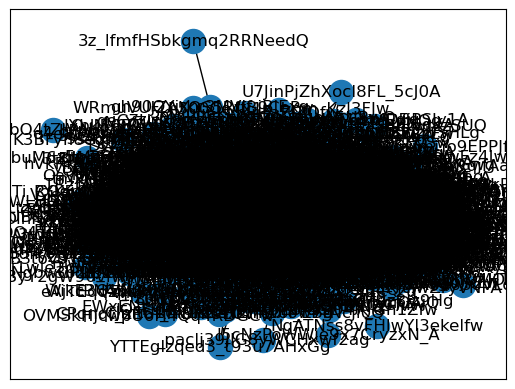

In [13]:
# create the graph
start_time = time.time()

df_users_unique = df_user.drop_duplicates(subset='user_id').reset_index()
df_users_unique['friends'] = df_users_unique['friends'].str.split(',')
# strip because it had some spaces between friends
df_users_unique['user_id'] = df_users_unique['user_id'].apply(lambda row: row.strip())
# explode works a lot of faster than doing a double for which I tried
df_edges = df_users_unique.explode('friends').reset_index(drop=True)
# strip because it had some spaces between friends
df_edges['friends'] = df_edges['friends'].apply(lambda row: row.strip())
df_edges = df_edges[df_edges['user_id'].isin(df_users_unique['user_id']) & df_edges['friends'].isin(df_users_unique['user_id'])]
G = nx.from_pandas_edgelist(df_edges, 'user_id', 'friends')
nx.draw_networkx(G)
print(len(G.nodes))
print(len(G.edges))

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

In [17]:
largest_cc = max(nx.connected_components(G), key=len)
print(len(largest_cc))

1504


Συμπέρασμα

Παρατηρούμε πως απλά δημιουργώντας το γράφημα έχουμε 1504 κόμβους που είναι όδοι περιμέναμε να πάρουμε από την μεγαλύτερη συνεκτική συνιστώσα. Για πληρότητα παρατίθεται πως βγάζουν ίδιο αποτέλεσμα. 

Από το παραπάνω μπορούμε να καταλάβουμε πως από τους 1604 κόμβους(χρήστες) που ξεκινήσαμε οι 100 δεν έχουν κανέναν φίλο από τους υπόλοιπους χρήστες που έχουμε για αυτό το λόγο και δεν συμπεριλαμβάνονται στην μεγαλύτερη συνεκτική συνιστώσα και δεν σχεδιάστηκαν εξαρχής στο γράφημα G.

# Step 2

In [18]:
print(df_user.shape)
df_user.head()

(101923, 24)


,user_id,business_id,stars,name,review_count,yelping_since,useful,funny,cool,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
1,smOvOajNG0lS4Pq7d8g4JQ,4_W5pstoN1166TGjjPOrMg,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
2,smOvOajNG0lS4Pq7d8g4JQ,mUIBtlWNPD7sz3rGGWQ1RA,3.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
3,smOvOajNG0lS4Pq7d8g4JQ,0-JRAY0LpBazDuA9761U5w,2.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0
4,smOvOajNG0lS4Pq7d8g4JQ,YqmClmk7oLcDzPWKHzgA-Q,4.0,Meg,176,2009-09-28 01:53:09,120,32,29,NaN,...,0,0,1,0,3,2,1,1,0,0


In [20]:
# drop duplicates to pick 100 unique users
# pick 100 users without replacement so they are unique
test_users = df_user['user_id'].drop_duplicates().sample(n=100,replace=False)
print(type(test_users.shape))
print(test_users.shape)
test_users.head()

<class 'tuple'>
(100,)


47779     QczCdRxNPg08FGbrj9n0VA
100131    -OZPBHH7RzyPIai4AlPWKA
61244     qeC7UzX6wj-5L5GTVgcl5w
55716     s-xVBnGjW1U4iqbTJRSu7Q
101026    kEfG0D2ga4vl0xbIUjZ3mA
Name: user_id, dtype: object

In [21]:
# from the dataframe keep only the rows with the same user_id
# to be able from them to choose the 100 businesses
df_business_avail = df_u_b_s[df_u_b_s['user_id'].isin(test_users)]
print(df_business_avail.shape)
df_business_avail.head()

(6366, 3)


,user_id,business_id,stars
16,BDyCY898xb7QexX-XJgrEw,RZtGWDLCAtuipwaZ-UfjmQ,4.0
19,Oi1qbcz2m2SnwUeztGYcnQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
20,Oi1qbcz2m2SnwUeztGYcnQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
29,eENfwrVhvOj5t7Gt1IKKAg,RZtGWDLCAtuipwaZ-UfjmQ,4.0
31,04hS_dGfUZd_5iJYRdPHLw,RZtGWDLCAtuipwaZ-UfjmQ,4.0


In [22]:
# drop duplicates to pick 100 unique businesses
# pick 100 businesses without replacement so they are unique
test_business = df_business_avail['business_id'].drop_duplicates().sample(n=100,replace=False)
print(test_business.shape)
test_business.head()

(100,)


57446    HTqXI5S2XcSlh_ylx9sE6g
4097     jkGQQ4_LgJx3hwPtCFkzbQ
76911    bmJgvpuf2GBXd62ELK0Q2w
6102     vtSisxaozZ7HWpBl_W7VaQ
65684    9c7MUiE6VI8NesjPdj5FkA
Name: business_id, dtype: object

Test set

In [23]:
df_test = df_u_b_s[df_u_b_s['user_id'].isin(test_users) &
                   df_u_b_s['business_id'].isin(test_business)]
# shuffle so test set dont have bias
df_test = df_test.sample(frac=1)
print(df_test.shape)
df_test.head()

(722, 3)


,user_id,business_id,stars
38641,s-xVBnGjW1U4iqbTJRSu7Q,ctHjyadbDQAtUFfkcAFEHw,5.0
100438,x-LrGPXN7WFX15Qk9B6_YQ,45ClmqPAagmNvdUojFULZA,5.0
25163,QczCdRxNPg08FGbrj9n0VA,qsAZNQ-6P4I9r7onkBZJ_g,3.0
4272,GdmJInilh9WAqAISitNGRw,jkGQQ4_LgJx3hwPtCFkzbQ,1.0
15383,z9uf9-0uX5Jh8-4Y5l2PQg,HS5CfzQ_gOJHgqwtv9rvNQ,3.0


In [24]:
df_test['user_id'].nunique()

100

In [25]:
df_test['business_id'].nunique()

100

Training set

In [26]:
# keep only the values that don't exist in the df_test
mask = ~df_u_b_s.isin(df_test).all(1)
df_train = df_u_b_s[mask]
df_train = df_train.sample(frac=1)
print(df_train.shape)
df_train.head()

(101201, 3)


,user_id,business_id,stars
65160,Uq1q5PzMmcQLMWx1GLA-CQ,-OIUunijjcq_ZzyyQhPPFQ,5.0
21141,_rX2xDlQtbDipXJpg53-bA,gOrJeoLDOiW7muWuoE-sMg,3.0
41644,WDrVbBxsNZt-0ytEyUAaBg,zwd4dyQ5ovnjVojWfAuhMw,4.0
86037,u1P7POW_Hy4V8xaOWbvf8g,zjTBfbvbN2Ps6_Ar0w-fuQ,2.0
94774,Obp8LRY_MRwUIqTPDbp6Zw,AKrFJ7vuBbLPfE9u2HVEkQ,4.0


take already generated train_set and test_set

In [27]:
df_train = pd.read_csv('train_data.csv')
print(df_train.shape)
df_train.head()

(96594, 4)


,Unnamed: 0,user_id,business_id,stars
0,3,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0
1,5,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0
2,10,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5.0
3,11,IKbjLnfBQtEyVzEu8CuOLg,VJEzpfLs_Jnzgqh5A_FVTg,4.0
4,13,NUtIAX-ygn474tDg5nmesg,6LCZLGa09Qifn6rG7-DNrg,4.0


In [28]:
df_test = pd.read_csv('test_data.csv')
print(df_test.shape)
df_test.head()

(797, 4)


,Unnamed: 0,user_id,business_id,stars
0,4267,mzL0zHFGyd9866OUljq49g,7lwe7n-Yc-V9E_HfLAeylg,3.0
1,8216,5GJ5aLTtTjGIiBz7i9GssQ,4_W5pstoN1166TGjjPOrMg,5.0
2,8611,-dnERQYQCDVZFMMuh7bBDg,XQWZQjC73fCTRGWnD18-Eg,3.0
3,11696,PV0U0arT_AUfjVBtrKfPSA,AlxnbBd2JNkozNvI0OvRLQ,5.0
4,12166,uxOjXmWuuEuHmF6rXFZfSw,4_W5pstoN1166TGjjPOrMg,4.0


# Step 3

In [29]:
df_train['user_id'].nunique()

1504

In [30]:
df_train['business_id'].nunique()

887

In [31]:
df_test['user_id'].nunique()

100

In [32]:
df_test['business_id'].nunique()

100

In [54]:
# group by 'user_id' and create a dictionary of dictionaries
hashmap = df_train.groupby('user_id').apply(lambda x: 
                                            dict(zip(x['business_id'],
                                                     x['stars']))).to_dict()

# print the new hashmap
print(len(hashmap))
#hashmap

1504


step 3 ola mazemena

In [34]:
# all together
# for this business_id(b) keep all the user_ids that have rated the business
start_time = time.time()
sr_list = []
for b in df_test['business_id'].unique():
    #b = 'vy0IlrE3Zl44HwxbsZhh2g'
    # users that have rated business(b)
    user_ids = df_train.loc[df_train['business_id'] == b, 'user_id'].unique()
    # assign each key-hashmap to node
    for user in G.nodes():
        G.nodes[user]['name'] = hashmap.get(user)
        # bale sto node(user_id) '=' thn timh pou uparxei sto hasmap gia to user
        if user in user_ids: # absorbing node
            G.nodes[user]['type'] = 'absorbing'
            G.nodes[user]['value'] = G.nodes[user]['name'].get(b)
        else:
            G.nodes[user]['type'] = 'non absorbing'
            G.nodes[user]['value'] = 0
    #old_values = np.array([G.nodes[user].get('value') for user in G.nodes()])
    old_values = np.array([])
    new_values = np.array([])
    threshold = 0.01
    converged = False
    first_pass=0
    while not converged:
        for user in G.nodes():
            if G.nodes[user]['type'] == 'non absorbing':
                neighbors_user = np.array([G.nodes[neighbor].get('value') for neighbor in G.neighbors(user)])
                r_u_b = np.mean(neighbors_user) # average
                new_values = np.append(new_values, r_u_b)
                G.nodes[user]['value'] = r_u_b
                if first_pass == 0:
                    old_values = np.append(old_values,0)
        # Check for convergence
        if np.all(np.abs(old_values - new_values) < threshold):
            converged = True
            #print('CONVERGED: The graph with the business')
        else:
            # If not converged, update old values and clear new values
            old_values = new_values
            new_values = np.array([])
        first_pass +=1

    # for predictions
    sr_users = df_test.loc[df_test['business_id'] == b, 'user_id']
    df_users = sr_users.reset_index()
    df_users['pred'] = df_users['user_id'].apply(lambda user: G.nodes[user]['value'])
    df_predictions = pd.concat([df_users],axis=1)
    sr_list.append(df_predictions)

df_predictions = pd.concat(sr_list,ignore_index=True,sort=True)
df_predictions = df_predictions.sort_values('index')    
print('all businesses converged')
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")

all business converged
Elapsed time: 314.4716203212738 seconds


In [35]:
print(df_users.head())
print(type(df_users))

   index                 user_id      pred
0    785  kaOV2JYS0-hdGm0ce3AIDQ  3.779863
1    787  ET8n-r7glWYqZhuR6GcdNw  3.735983
<class 'pandas.core.frame.DataFrame'>


In [36]:
print(df_predictions.shape)
df_predictions.head()

(797, 3)


,index,pred,user_id
0,0,3.707051,mzL0zHFGyd9866OUljq49g
17,1,4.041174,5GJ5aLTtTjGIiBz7i9GssQ
35,2,3.811736,-dnERQYQCDVZFMMuh7bBDg
40,3,4.120912,PV0U0arT_AUfjVBtrKfPSA
18,4,4.109285,uxOjXmWuuEuHmF6rXFZfSw


In [37]:
print(df_test.shape)
df_test.head()

(797, 4)


,Unnamed: 0,user_id,business_id,stars
0,4267,mzL0zHFGyd9866OUljq49g,7lwe7n-Yc-V9E_HfLAeylg,3.0
1,8216,5GJ5aLTtTjGIiBz7i9GssQ,4_W5pstoN1166TGjjPOrMg,5.0
2,8611,-dnERQYQCDVZFMMuh7bBDg,XQWZQjC73fCTRGWnD18-Eg,3.0
3,11696,PV0U0arT_AUfjVBtrKfPSA,AlxnbBd2JNkozNvI0OvRLQ,5.0
4,12166,uxOjXmWuuEuHmF6rXFZfSw,4_W5pstoN1166TGjjPOrMg,4.0


In [38]:
# for users
rmse_user = math.sqrt(mean_squared_error(df_test['stars'], df_predictions['pred']))
print(rmse_user)

0.8980835727077218


Συμπέρασμα

Παρατηρούμε πως με το value propagation έχουμε μια ποκλυ καλή τιμή για το mean squared error

# Step 4

In [50]:
print(df_train.shape)
df_test.shape

(96594, 4)


(797, 4)

# UA

In [47]:
# User Average (UA) - mesh bathmologia kathe xrhsth
df_user_avg = df_train.groupby('user_id').mean().reset_index()
# inner or right same 
df_user_m = pd.merge(df_user_avg,df_test, on='user_id', how='right') 
rmse_user = math.sqrt(mean_squared_error(df_user_m['stars_x'], df_user_m['stars_y']))
print(rmse_user)

0.9012981678615509


# BA

In [53]:
# Business Average (BA) - mesh bathmologia kathe epixeirhshs
df_bus_avg = df_train.groupby('business_id').mean().reset_index()
# inner or right same 
df_bus_m = pd.merge(df_bus_avg,df_test, on='business_id', how='right')
rmse_business = math.sqrt(mean_squared_error(df_bus_m['stars_x'], df_bus_m['stars_y']))
print(rmse_business)

0.8698495174282991


Συμπέρασμα

Παρατηρούμε πως για αυτό το dataset παίρνουμε πάλι πολύ καλές τιμές από τους αλγορίθμους UA και BA.